# 4 September 2018

In [2]:
import numpy as np
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

### Load data from tips.csv dataset on google drive.

In [3]:
tips=Table.read_table("tips.csv")
tips

total_bill,tip,sex,smoker,day,time,size
16.99,1.01,Female,No,Sun,Dinner,2
10.34,1.66,Male,No,Sun,Dinner,3
21.01,3.5,Male,No,Sun,Dinner,3
23.68,3.31,Male,No,Sun,Dinner,2
24.59,3.61,Female,No,Sun,Dinner,4
25.29,4.71,Male,No,Sun,Dinner,4
8.77,2,Male,No,Sun,Dinner,2
26.88,3.12,Male,No,Sun,Dinner,4
15.04,1.96,Male,No,Sun,Dinner,2
14.78,3.23,Male,No,Sun,Dinner,2


### Find the mean tip broken down by sex. Overlay the histogram for tips received by males with the histogram of tips received by females.

In [4]:
tips_f = tips.where(tips.column("sex"),are.not_equal_to("Male"))
tips_f

total_bill,tip,sex,smoker,day,time,size
16.99,1.01,Female,No,Sun,Dinner,2
24.59,3.61,Female,No,Sun,Dinner,4
35.26,5,Female,No,Sun,Dinner,4
14.83,3.02,Female,No,Sun,Dinner,2
10.33,1.67,Female,No,Sun,Dinner,3
16.97,3.5,Female,No,Sun,Dinner,3
20.29,2.75,Female,No,Sat,Dinner,2
15.77,2.23,Female,No,Sat,Dinner,2
19.65,3,Female,No,Sat,Dinner,2
15.06,3,Female,No,Sat,Dinner,2


### The mean tip for females is . . .

In [5]:
avg_f_tip = np.mean(tips_f.column("tip"))
avg_f_tip

2.8334482758620685

In [6]:
tips_m = tips.where(tips.column("sex"),are.not_equal_to("Female"))
tips_m

total_bill,tip,sex,smoker,day,time,size
10.34,1.66,Male,No,Sun,Dinner,3
21.01,3.5,Male,No,Sun,Dinner,3
23.68,3.31,Male,No,Sun,Dinner,2
25.29,4.71,Male,No,Sun,Dinner,4
8.77,2,Male,No,Sun,Dinner,2
26.88,3.12,Male,No,Sun,Dinner,4
15.04,1.96,Male,No,Sun,Dinner,2
14.78,3.23,Male,No,Sun,Dinner,2
10.27,1.71,Male,No,Sun,Dinner,2
15.42,1.57,Male,No,Sun,Dinner,2


### The mean tip for males is . . .

In [7]:
avg_m_tip = np.mean(tips_m.column("tip"))
avg_m_tip

3.0896178343949043

### I'm going to make a table with two columns, one for the tips received by males, one for the tips received by females. Hopefully this will make it easier to make an overlaid histogram.

tip_mandf=Table().with_column("Male", tips_m.column("tip")).with_column("Female",tips_f.column("tip"))
tip_mandf

### It turns out this won't work because the column containing female tips doesn't have as many values as the column for males. 

### Here are the overlaid histograms

C:\Users\C20Emma.Bonner\Documents\2018-2019\Math_377\Python3.6\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


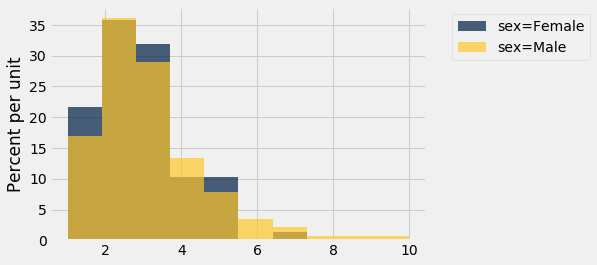

In [8]:
tips.hist("tip",group="sex")

### It looks like males generally received more tips than females, especially as the price of the meal increased.

C:\Users\C20Emma.Bonner\Documents\2018-2019\Math_377\Python3.6\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


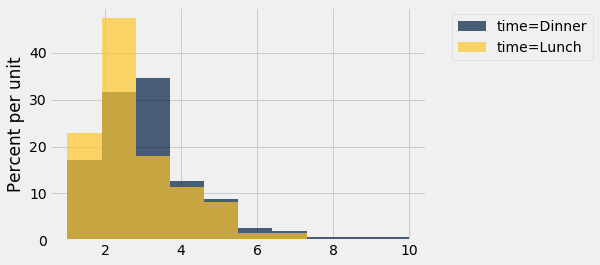

In [9]:
tips.hist("tip",group="time")

### Above is a histogram of tips given with the dinner meal overlaid with tips given at the lunch meal. It appears that a greater percentage of tips were given out at lunch than at dinner, but also that people spent less on their meals at lunch.

In [10]:
def weekday_to_num(str):
    
    """ This function will take an 3-letter string as an input and convert it to a number representing that day of the week. """
    
    if str == "Mon": 
        return 1
    elif str == "Tues": 
        return 2
    elif str == "Wed":
        return 3
    elif str == "Thur":
        return 4
    elif str == "Fri":
        return 5
    elif str == "Sat":
        return 6
    elif str == "Sun":
        return 7
    else:
        return "The string value must be the abbreviation of one of the seven days of the week."
        

In [11]:
weekday_to_num("Mon")

1

### Now I'll apply that function to the weekday column in the table 'tips' and create a new column with the values produced.

In [12]:
day_num = tips.apply(weekday_to_num, "day")

In [13]:
tips.with_column("weekday_num", day_num)

total_bill,tip,sex,smoker,day,time,size,weekday_num
16.99,1.01,Female,No,Sun,Dinner,2,7
10.34,1.66,Male,No,Sun,Dinner,3,7
21.01,3.5,Male,No,Sun,Dinner,3,7
23.68,3.31,Male,No,Sun,Dinner,2,7
24.59,3.61,Female,No,Sun,Dinner,4,7
25.29,4.71,Male,No,Sun,Dinner,4,7
8.77,2,Male,No,Sun,Dinner,2,7
26.88,3.12,Male,No,Sun,Dinner,4,7
15.04,1.96,Male,No,Sun,Dinner,2,7
14.78,3.23,Male,No,Sun,Dinner,2,7


### I'm going to make a function that will estimate the tip amount for a given bill based on the average tip given on bills of similar value.

In [20]:
def est_tip(bill, range_nearby):
    """ This function will take the total bill, then a range of values that would be considered nearby the bill's value. 
        Then it will take an average of the tips given on each of the bills in that range and provide that average as an output. """
    upper = bill + range_nearby
    lower = bill - range_nearby
    range_tips = tips.where("total_bill",are.between(lower, upper)).column("tip")
    return np.mean(range_tips)                        
    

In [21]:
est_tip(20,1)

3.143333333333333

In [23]:
new_tips=tips.with_column("predicted_tip", tips.apply(lambda x: est_tip(x,2), "total_bill"))
new_tips

total_bill,tip,sex,smoker,day,time,size,predicted_tip
16.99,1.01,Female,No,Sun,Dinner,2,2.767
10.34,1.66,Male,No,Sun,Dinner,3,1.86486
21.01,3.5,Male,No,Sun,Dinner,3,3.21486
23.68,3.31,Male,No,Sun,Dinner,2,3.67333
24.59,3.61,Female,No,Sun,Dinner,4,3.6272
25.29,4.71,Male,No,Sun,Dinner,4,3.63154
8.77,2,Male,No,Sun,Dinner,2,1.86857
26.88,3.12,Male,No,Sun,Dinner,4,3.76474
15.04,1.96,Male,No,Sun,Dinner,2,2.54036
14.78,3.23,Male,No,Sun,Dinner,2,2.46036


### This is a scatter plot with the predicted tip amounts overlaid with the tip actually paid.

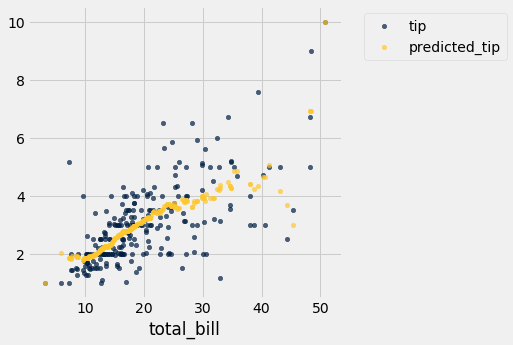

In [27]:
new_tips.scatter("total_bill",["tip", "predicted_tip"])

### The predicted tips in yellow have a linear plot which makes sense because those values are the average of all tips given with bills "nearby" the bill being considered.